# R - Jupyter Project Environment
## Author: Jeffrey Grover
## Date: 2024-06-01
### Purpose:
The second half of our polyglot Jupyter project, this half uses R.

This R example is intended to be run first.

### Create an Output Dir

In [38]:
system("mkdir polyglot_jupyter_example_r")

In [39]:
list.files()

[1] "images"                            "LICENSE"                          
 [3] "polyglot_jupyter_example_py"       "polyglot_jupyter_example_py.ipynb"
 [5] "polyglot_jupyter_example_r"        "polyglot_jupyter_example_r.ipynb" 
 [7] "README.md"                         "renv"                             
 [9] "renv.lock"                         "requirements.txt"                 
[11] "test_data"

### Confirm the setup
Because [renv](https://rstudio.github.io/renv/index.html) is just an R package, it plays nicely with notebooks. When the R interpreter is called by jupyter inside the project folder it automatically uses the environment you created.

In [6]:
# Confirm that only the tidyverse packages and their dependencies are here

installed.packages() |> rownames()

[1] "askpass"       "backports"     "base64enc"     "bit"          
  [5] "bit64"         "blob"          "broom"         "bslib"        
  [9] "cachem"        "callr"         "cellranger"    "cli"          
 [13] "clipr"         "colorspace"    "conflicted"    "cpp11"        
 [17] "crayon"        "curl"          "data.table"    "DBI"          
 [21] "dbplyr"        "digest"        "dplyr"         "dtplyr"       
 [25] "evaluate"      "fansi"         "farver"        "fastmap"      
 [29] "fontawesome"   "forcats"       "fs"            "gargle"       
 [33] "generics"      "ggplot2"       "glue"          "googledrive"  
 [37] "googlesheets4" "gtable"        "haven"         "highr"        
 [41] "hms"           "htmltools"     "httr"          "ids"          
 [45] "IRdisplay"     "IRkernel"      "isoband"       "jquerylib"    
 [49] "jsonlite"      "knitr"         "labeling"      "lifecycle"    
 [53] "lubridate"     "magrittr"      "memoise"       "mime"         
 [57] "modelr"        "munsell"       "openssl"       "pbdZMQ"       
 [61] "pillar"        "pkgconfig"     "prettyunits"   "processx"     
 [65] "progress"      "ps"            "purrr"         "R6"           
 [69] "ragg"          "rappdirs"      "RColorBrewer"  "readr"        
 [73] "readxl"        "rematch"       "rematch2"      "renv"         
 [77] "repr"          "reprex"        "rlang"         "rmarkdown"    
 [81] "rstudioapi"    "rvest"         "sass"          "scales"       
 [85] "selectr"       "stringi"       "stringr"       "sys"          
 [89] "systemfonts"   "textshaping"   "tibble"        "tidyr"        
 [93] "tidyselect"    "tidyverse"     "timechange"    "tinytex"      
 [97] "tzdb"          "utf8"          "uuid"          "vctrs"        
[101] "viridisLite"   "vroom"         "withr"         "xfun"         
[105] "xml2"          "yaml"          "base"          "boot"         
[109] "class"         "cluster"       "codetools"     "compiler"     
[113] "datasets"      "foreign"       "graphics"      "grDevices"    
[117] "grid"          "KernSmooth"    "lattice"       "MASS"         
[121] "Matrix"        "methods"       "mgcv"          "nlme"         
[125] "nnet"          "parallel"      "rpart"         "spatial"      
[129] "splines"       "stats"         "stats4"        "survival"     
[133] "tcltk"         "tools"         "utils"

**Note:** I have a lot of packages installed globally, including lots from bioconductor. These are
not visible here. Therefore, we are successfully running an R kernel inside the renv.

You're also going to most likely want to set up an `.renvignore` rather than just relying on it
parsing your `.gitignore`. renv has a hard time parsing large files and it appears to lock
the R terminal when that happens. You can use my example: [.renvignore](.renvignore).

In [8]:
# This tells you the status of packages in the lockfile vs what's used

renv::status()

The following package(s) are in an inconsistent state:

 package   installed recorded used
 base64enc y         n        y   
 cli       y         n        y   
 crayon    y         n        y   
 digest    y         n        y   
 evaluate  y         n        y   
 fansi     y         n        y   
 fastmap   y         n        y   
 glue      y         n        y   
 htmltools y         n        y   
 IRdisplay y         n        y   
 IRkernel  y         n        y   
 jsonlite  y         n        y   
 lifecycle y         n        y   
 pbdZMQ    y         n        y   
 pillar    y         n        y   
 repr      y         n        y   
 rlang     y         n        y   
 utf8      y         n        y   
 uuid      y         n        y   
 vctrs     y         n        y   

See ?renv::status() for advice on resolving these issues.


**Result:** renv notices that we're using jupyter notebooks, and these packages are dependencies of the R kernel. It is expected.

### Load Required Libraries

In [9]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Get Some Test Data
We can just use the same test data, which has been saved in the `test_data` folder.

In [11]:
# Load the same test dataset

titanic <- read_csv("test_data/titanic.csv")

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
titanic |> head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [16]:
titanic |> summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

### Do Some "Analysis"
Question: Did different classes have different survival rates?

In [17]:
# Make a copy for further use

titanic_survival <- titanic

In [18]:
# Convert the survived to boolean

titanic_survival$Survived <- titanic_survival$Survived |> as.logical()

In [33]:
# Perform the same "analysis" as in Python

titanic_survival <- titanic_survival |>
    count(Pclass, Survived)

titanic_survival

Pclass,Survived,n
<dbl>,<lgl>,<int>
1,FALSE,80
1,TRUE,136
2,FALSE,97
2,TRUE,87
3,FALSE,372
3,TRUE,119


In [63]:
titanic_survival |> head()

Pclass,Survived,n,Percentage
<dbl>,<lgl>,<int>,<dbl>
1,FALSE,80,37.03704
1,TRUE,136,62.96296
2,FALSE,97,52.71739
2,TRUE,87,47.28261
3,FALSE,372,75.76375
3,TRUE,119,24.23625


In [67]:
# Add a column for percent survival

titanic_survival <- titanic_survival |>
    group_by(Pclass) |>
    mutate(
        Percentage = (n/sum(n) * 100)
    ) |>
    ungroup()

titanic_survival

Pclass,Survived,n,Percentage
<dbl>,<lgl>,<int>,<dbl>
1,FALSE,80,37.03704
1,TRUE,136,62.96296
2,FALSE,97,52.71739
2,TRUE,87,47.28261
3,FALSE,372,75.76375
3,TRUE,119,24.23625


**Result:** Same as before, I'm just far more familiar with the tidyverse syntax.

In [41]:
# Save as a csv

titanic_survival |> write_csv("polyglot_jupyter_example_r/titanic_survival.csv")

### Make Visualizations

In [70]:
# Get survival rate by class and sex

titanic_survival_2 <- titanic |>
    mutate(
        Survived = as.logical(Survived)
    ) |>
    group_by(Pclass, Survived, Sex) |>
    count() |>
    group_by(Pclass, Sex) |>
    mutate(
        Percentage = (n/sum(n) * 100)
    ) |>
    ungroup()

titanic_survival_2

Pclass,Survived,Sex,n,Percentage
<dbl>,<lgl>,<chr>,<int>,<dbl>
1,FALSE,female,3,3.191489
1,FALSE,male,77,63.114754
1,TRUE,female,91,96.808511
1,TRUE,male,45,36.885246
2,FALSE,female,6,7.894737
2,FALSE,male,91,84.259259
2,TRUE,female,70,92.105263
2,TRUE,male,17,15.740741
3,FALSE,female,72,50.000000


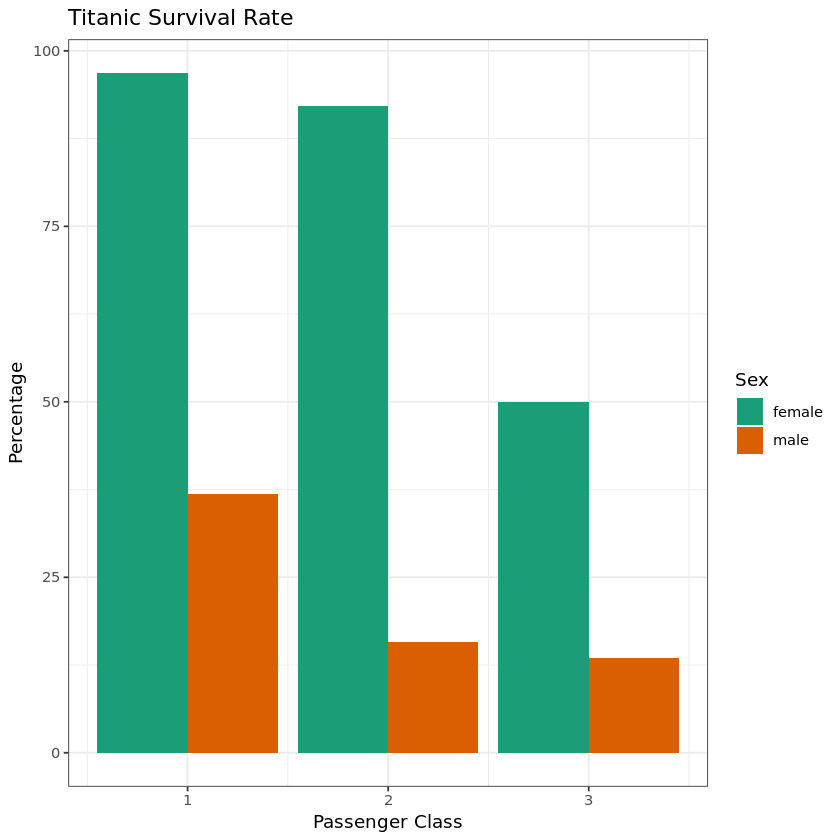

In [154]:
# Make a bar plot of survival rate by class and sex

titanic_survival_2 |> filter(Survived) |>
    ggplot(aes(
        x = Pclass,
        y = Percentage,
        fill = Sex
    )) +
    geom_col(
        position = "dodge"
    ) +
    scale_fill_brewer(
        type = "qual",
        palette = "Dark2"
    ) +
    labs(
        title = "Titanic Survival Rate",
        x = "Passenger Class"
    ) +
    theme_bw() 

**Note:** It's a little bit more verbose than seaborn in this instance, but ggplot2 has many more options. Sometimes things are easier in one or the other.

Warning message:
“Removed 177 rows containing missing values or values outside the scale range (`geom_point()`).”


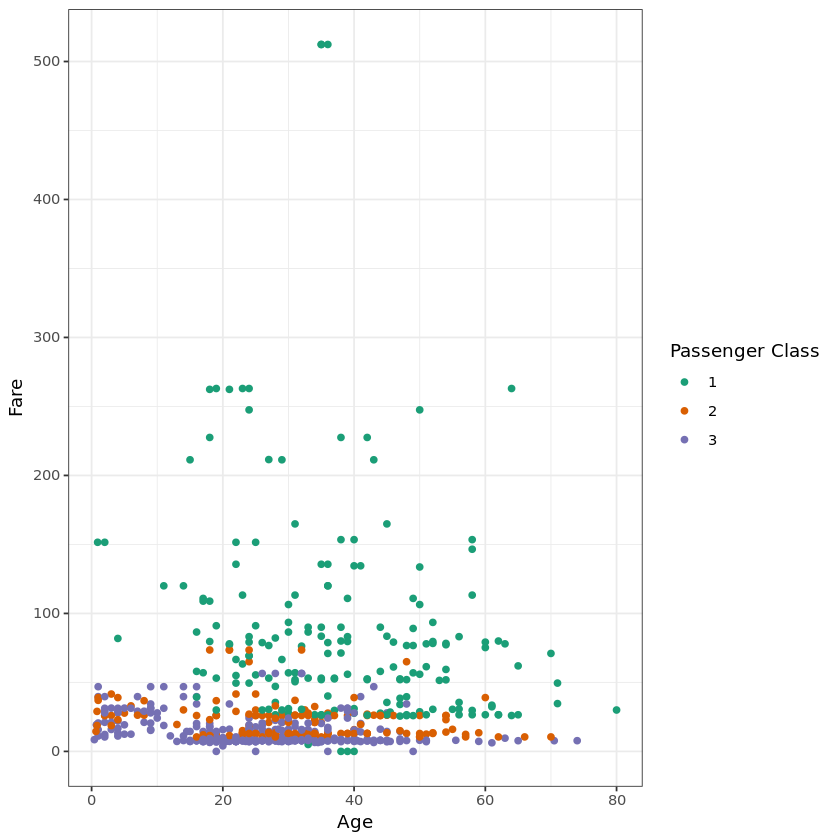

In [104]:
# Plot the fare by class and age

titanic |>
    ggplot(aes(
        x = Age,
        y = Fare,
        color = as.character(Pclass)
    )) +
    geom_point() +
    scale_color_brewer(
        type = "qual",
        palette = "Dark2"
    ) +
    labs(
        color = "Passenger Class"
    ) +
    theme_bw()

In [155]:
# To make the swarmplot we need ggbeeswarm
install.packages("ggbeeswarm")
library(ggbeeswarm)

The following package(s) will be installed:
- ggbeeswarm [0.7.2]
These packages will be installed into "~/Development/github/polyglot_jupyter_example/renv/library/linux-ubuntu-focal/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ggbeeswarm ...                     OK [linked from cache]


Warning message:
“Removed 177 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Warning message:
“Removed 177 rows containing missing values or values outside the scale range (`geom_point()`).”


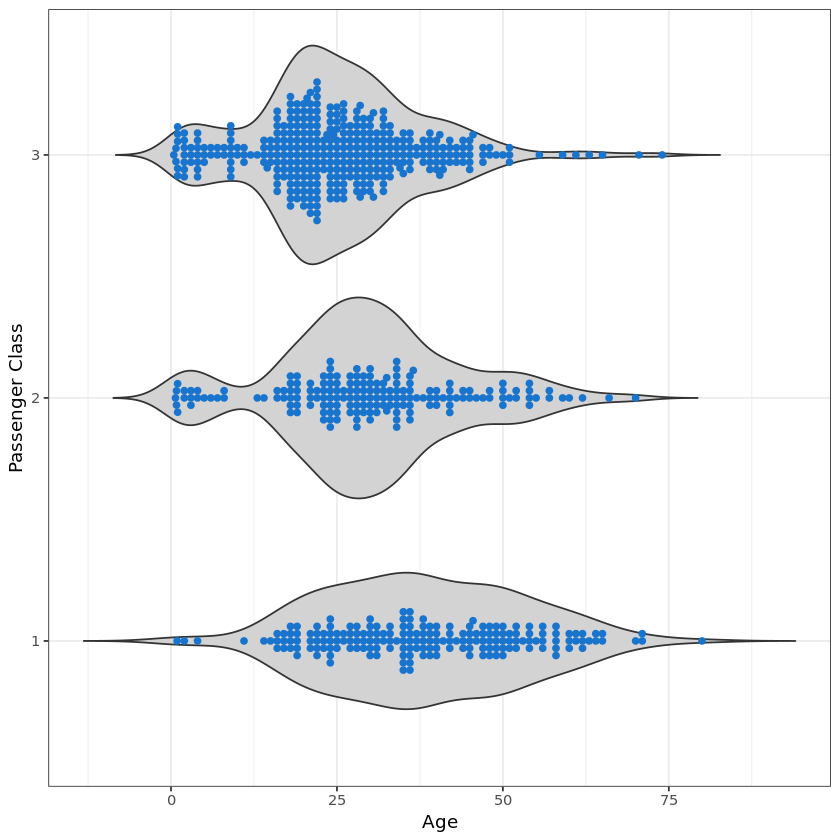

In [126]:
# Combination violin and swarmplot, just like the python example
# Swarmplots are a separate package, this is an approximation with a dotplot instead

titanic |>
    ggplot(aes(
        y = as.character(Pclass),
        x = Age
    )) +
    geom_violin(
        fill = "lightgrey",
        trim = FALSE
    ) +
    geom_beeswarm(
        color = "dodgerblue3"
    ) +
    labs(
        y = "Passenger Class"
    ) +
    theme_bw()

### Conclusion

Jupyter installed at the global/user level can indeed interact with an IR kernel within an renv.

### Document the Environment
Running `renv::snapshot()` will update the [renv.lock](renv.lock). I like to ensure all the packages
in the environment are captured with `type = "all"` to avoid parsing potentially large notebook files
and just record everything installed in the environment.

If you've like more intelligent behavior then also saving your notebook as a plain `.r` script and
ignoring all `.ipynb` files in the project directory with your `.renvignore` should allow it to
record packages and dependencies as intended. However, I opt here for completeness over succinctness.

In [157]:
# Update the lock file

renv::snapshot(type = "all")

The following package(s) will be updated in the lockfile:

# CRAN -----------------------------------------------------------------------
- askpass         [* -> 1.2.0]
- backports       [* -> 1.5.0]
- base64enc       [* -> 0.1-3]
- beeswarm        [* -> 0.4.0]
- bit             [* -> 4.0.5]
- bit64           [* -> 4.0.5]
- blob            [* -> 1.2.4]
- boot            [* -> 1.3-30]
- broom           [* -> 1.0.6]
- bslib           [* -> 0.7.0]
- cachem          [* -> 1.1.0]
- callr           [* -> 3.7.6]
- cellranger      [* -> 1.1.0]
- class           [* -> 7.3-22]
- cli             [* -> 3.6.2]
- clipr           [* -> 0.8.0]
- cluster         [* -> 2.1.6]
- codetools       [* -> 0.2-20]
- colorspace      [* -> 2.1-0]
- conflicted      [* -> 1.2.0]
- cpp11           [* -> 0.4.7]
- crayon          [* -> 1.5.2]
- curl            [* -> 5.2.1]
- data.table      [* -> 1.15.4]
- DBI             [* -> 1.2.2]
- dbplyr          [* -> 2.5.0]
- digest          [* -> 0.6.35]
- dplyr           [*

You can restore an environment from the lockfile with `renv::restore()`.

In [159]:
# I also export the notebook as a .r script so it can be run without jupyter and .html so non-coders can view it

system("jupyter nbconvert --to script --output-dir ./polyglot_jupyter_example_r/ polyglot_jupyter_example_r.ipynb")
system("jupyter nbconvert --to html --output-dir ./polyglot_jupyter_example_r/ polyglot_jupyter_example_r.ipynb")

In [160]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.8.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
 [1] ggbeeswarm_0.7.2 lubridate_1.9.3  forcats_1.0.0    stringr_1.5.1   
 [5] dplyr_1.1.4      purrr_1.0.2      readr_2.1.5      tidyr_1.3.1     
 [9] tibble_3.2.1     ggplot2_3.5.1    tidyverse_2.0.0 

loaded via a namespace (and not attached):
 [1] gtable_0.3.5       beeswarm_0.4.0     x